In [36]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from sklearn.metrics import classification_report


random_state = 42

In [37]:
fashion_mnist =  tf.keras.datasets.fashion_mnist.load_data()

In [38]:
(xtrain, ytrain) , (xtest, ytest) = fashion_mnist

In [39]:
xtrain = xtrain.reshape(-1,28,28,1)/255.0
Xtest = xtest.reshape(-1,28,28,1) /255.0

In [40]:
xtrain.shape


(60000, 28, 28, 1)

In [41]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.SpatialDropout2D(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model_hist = model.fit(xtrain,ytrain,epochs = 12,
                       validation_split = 0.2)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7761 - loss: 0.6361 - val_accuracy: 0.8829 - val_loss: 0.3338
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.8847 - loss: 0.3242 - val_accuracy: 0.8989 - val_loss: 0.2877
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9021 - loss: 0.2727 - val_accuracy: 0.8997 - val_loss: 0.2765
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9098 - loss: 0.2455 - val_accuracy: 0.9021 - val_loss: 0.2698
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9187 - loss: 0.2259 - val_accuracy: 0.9100 - val_loss: 0.2500
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9277 - loss: 0.2008 - val_accuracy: 0.9116 - val_loss: 0.2492
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9328 - loss: 0.1788 - val_accuracy: 0.9111 - val_loss: 0.2515
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9366 -

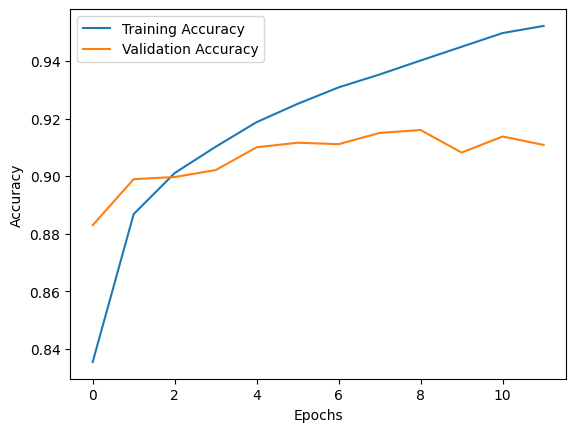

In [44]:
plt.plot(model_hist.history['accuracy'], label = "Training Accuracy")
plt.plot(model_hist.history['val_accuracy'], label = "Validation Accuracy")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [45]:
test_loss, test_acc = model.evaluate(Xtest, ytest)
print('\nTest accuracy: ', test_acc)
print('Test Loss : ',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9066 - loss: 0.3013

Test accuracy:  0.9078999757766724
Test Loss :  0.29405179619789124
